In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/bank.csv', delimiter=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


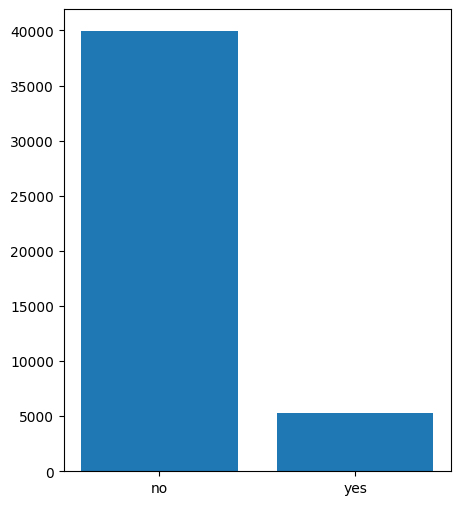

In [ ]:
plt.figure(figsize=(5,6))
data = df['y'].value_counts()

plt.bar(data.index,data.values)
plt.show()

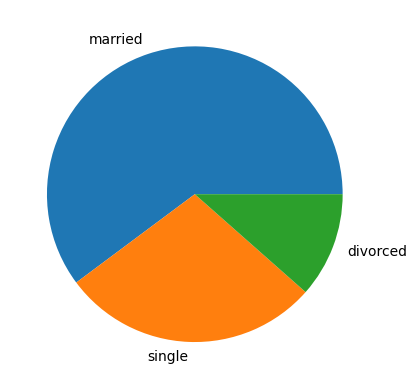

In [ ]:
marital = df['marital'].value_counts()

plt.pie(marital,labels= df['marital'].unique())
plt.show()

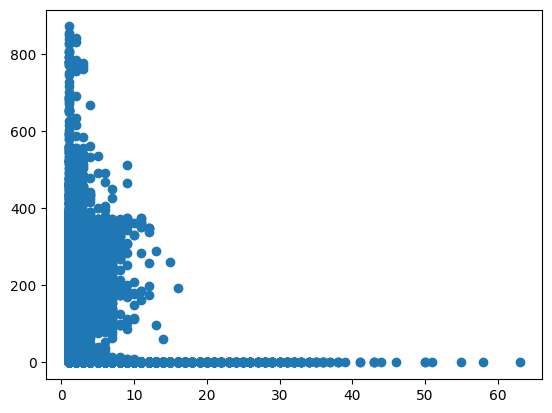

In [ ]:
x = df['campaign']
y = df['pdays']
plt.scatter(x, y)

plt.show()

### Preporcessing

In [ ]:
!pip install imbalanced-learn

In [ ]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

df['job'] = lc.fit_transform(df['job'])
df['marital'] = lc.fit_transform(df['marital'])
df['education'] = lc.fit_transform(df['education'])
df['default'] = lc.fit_transform(df['default'])
df['housing'] = lc.fit_transform(df['housing'])
df['loan'] = lc.fit_transform(df['loan'])
df['contact'] = lc.fit_transform(df['contact'])
df['month'] = lc.fit_transform(df['month'])
df['poutcome'] = lc.fit_transform(df['poutcome'])

In [ ]:
X = df.drop(['y'],axis=1)
y = df['y']

In [ ]:
y = lc.fit_transform(y)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.47      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



<Axes: >

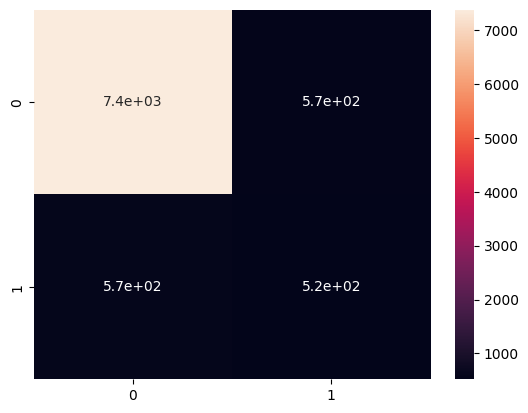

In [ ]:
con_mat = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(con_mat, annot=True)

In [ ]:
# from imblearn import SMOTE

# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)